In [12]:
import sys 
sys.path.append('..')
import networkx as nx
import EoNlocal as EoN
import quarantines as Q 
import utils
import matplotlib.pyplot as plt
import gc
import ipywidgets as widgets

In [4]:
# SIMPLE SETUP 
N = 10 ** 4
G = nx.barabasi_albert_graph(N, 8)

tmax = float('inf')
iterations = 5  #run 5 simulations
tau = 0.15        #transmission rate
gamma = 1.0    #recovery rate
rho = 0.005      #random fraction initially infected

In [70]:
tup_out = Q.quarantines_by_time(G, tau, gamma, rho, [1.0, 3.0], float('inf'), num_iter=5)


<IPython.core.display.Javascript object>


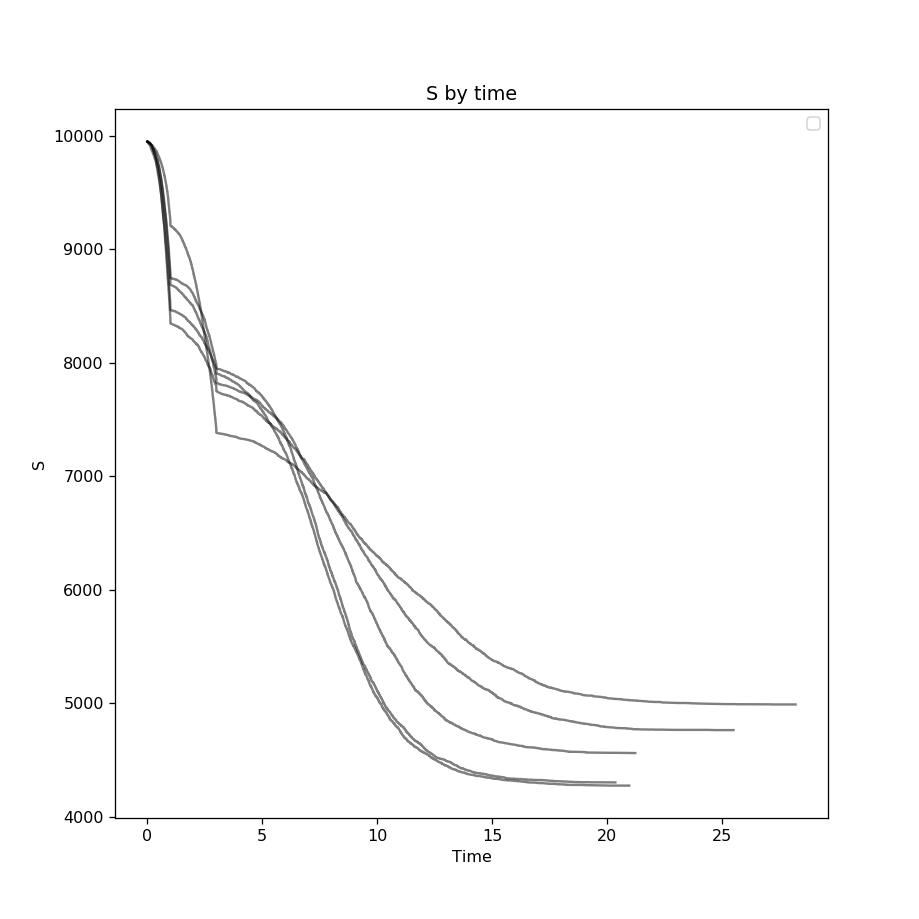

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


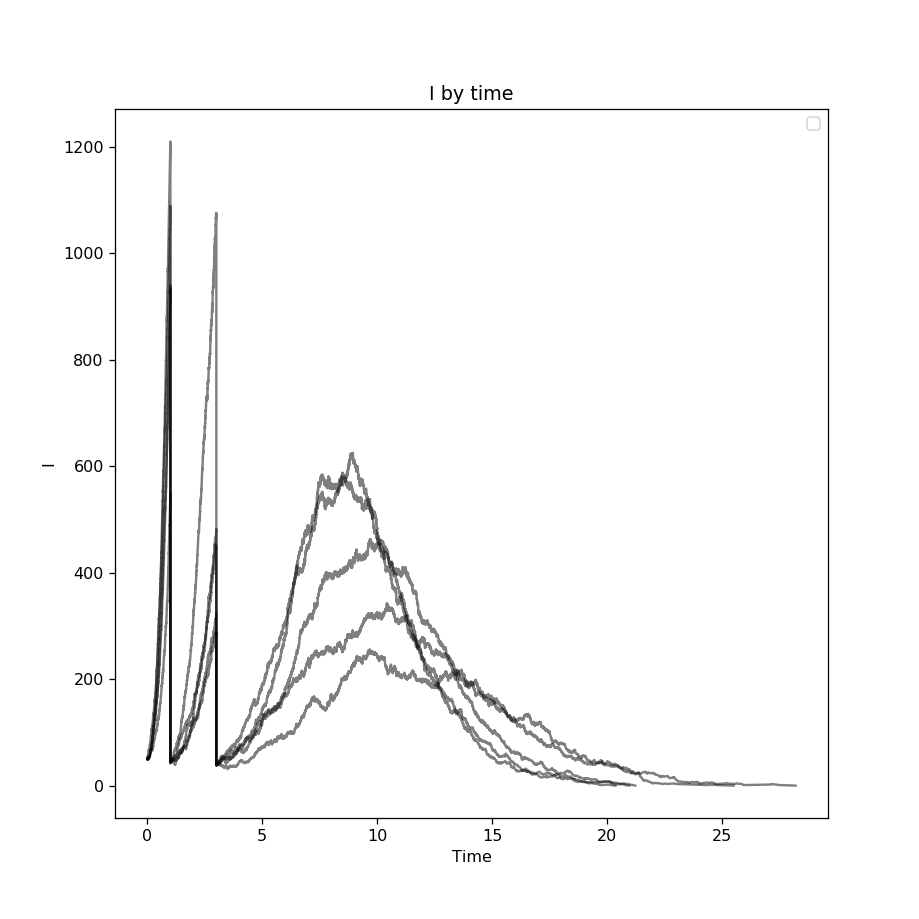

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


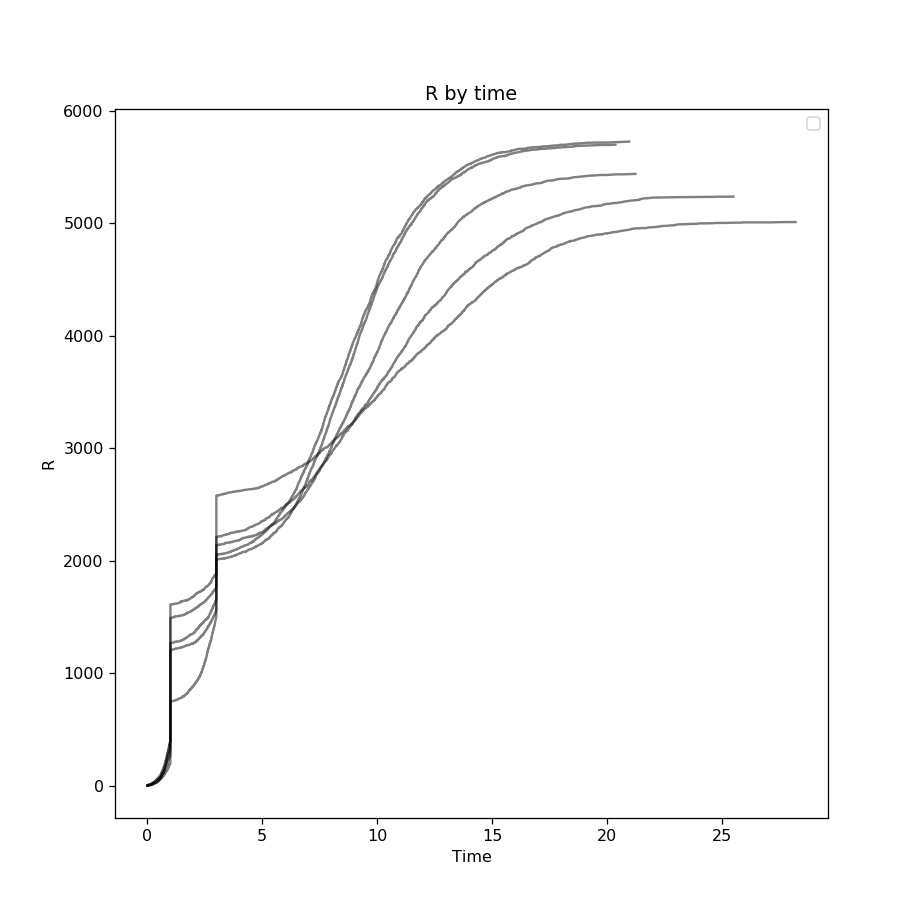

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


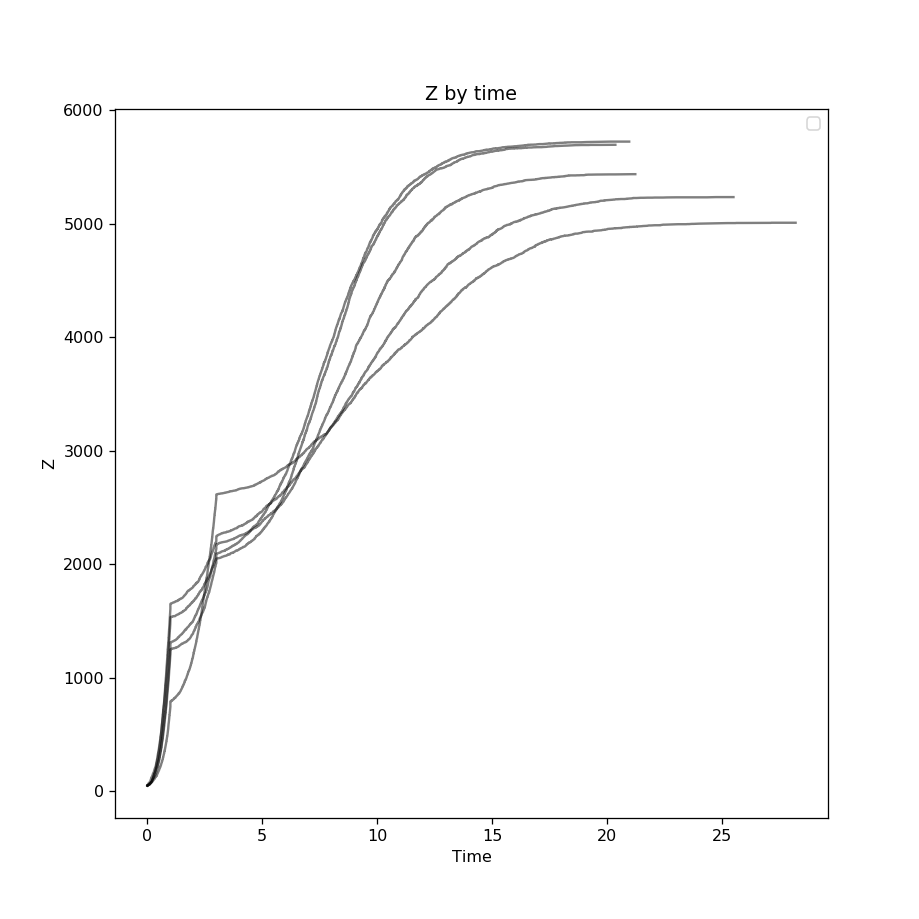

No handles with labels found to put in legend.


In [72]:
tup_out.plot_single('SIRZ')

In [5]:
def get_perc_survived_by_prop(prange, num_iter):
    outputs = {} 
    for p in prange:
        print("PROP ", p)
        graph_outs = [Q.run_until_prop_IR(G, tau ,gamma, rho, float('inf'), p)[0] for _ in range(num_iter)]
        
        degdict = Q.DegreeXDict.from_start_ends(G, graph_outs)
        outputs[p] = degdict.percent_survived()
        gc.collect()
    return outputs

In [6]:
percent_outs = get_perc_survived_by_prop([0.02 * _ for _ in range(1, 21)], 10)

PROP  0.02
PROP  0.04
PROP  0.06
PROP  0.08
PROP  0.1
PROP  0.12
PROP  0.14
PROP  0.16
PROP  0.18
PROP  0.2
PROP  0.22
PROP  0.24
PROP  0.26
PROP  0.28
PROP  0.3
PROP  0.32
PROP  0.34
PROP  0.36
PROP  0.38
PROP  0.4


4704

In [ ]:
for k, degdict in percent_outs.items():
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(*zip(*sorted(degdict.items(), key=lambda d: d[0])))
    ax.set_title("Prop %s" % k)

In [ ]:
graph_outs = [Q.run_until_prop_IR(G, tau, gamma, rho, float('inf'), 0.2)[0] for _ in range(100)]

In [ ]:
degdict = Q.DegreeXDict.from_start_ends(G, graph_outs)

In [ ]:
plt.plot(sorted(degdict.percent_survived().items(), key=lambda d: d[0])

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(*zip(*sorted(degdict.percent_survived().items(), key=lambda d: d[0])))

In [ ]:
xisitions = [Q.degree_transition_dict(G, _) for _ in graph_outs]

In [ ]:
utils.mergesum(xisitions)

<IPython.core.display.Javascript object>


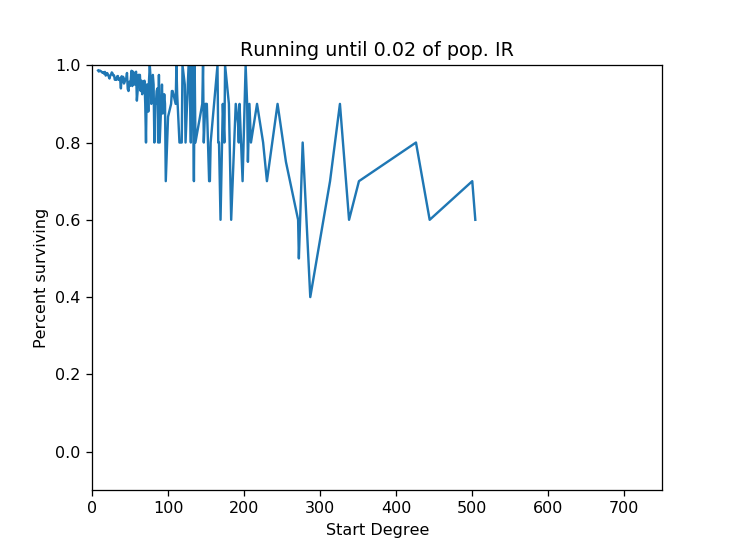

interactive(children=(FloatSlider(value=0.2, description='w', max=0.4, min=0.02, step=0.02), Output()), _dom_c…

<function __main__.update(w=1.0)>

In [52]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

line, = ax.plot(x, np.sin(x))
ax.plot(list())
ax.set_xlim(0, 750)
ax.set_ylim(-0.1, 1.0)
ax.set_xlabel("Start Degree")
ax.set_ylabel("Percent surviving")
def update(w = 1.0):
    ax.set_title("Running until %s of pop. IR" % w)
    spo = sorted(percent_outs[w].items())
    line.set_xdata([_[0] for _ in spo])
    line.set_ydata([_[1] for _ in spo])
    fig.canvas.draw_idle()

interact(update, w=FloatSlider(value=0.2, min=0.02, max=0.4, step=0.02))

In [35]:
max(percent_outs.keys())

0.4

In [43]:
sorted(percent_outs[0.04].items())

[(8, 0.9740963855421687),
 (9, 0.9722705961152043),
 (10, 0.9720292504570384),
 (11, 0.9682080924855492),
 (12, 0.9729001584786053),
 (13, 0.9702),
 (14, 0.9604215456674473),
 (15, 0.9692090395480226),
 (16, 0.96),
 (17, 0.9625954198473282),
 (18, 0.9526829268292683),
 (19, 0.9471153846153846),
 (20, 0.945398773006135),
 (21, 0.9624),
 (22, 0.9342342342342342),
 (23, 0.94375),
 (24, 0.9430232558139535),
 (25, 0.9310810810810811),
 (26, 0.9382716049382716),
 (27, 0.9596491228070175),
 (28, 0.9366666666666666),
 (29, 0.9447368421052632),
 (30, 0.9208333333333333),
 (31, 0.9166666666666666),
 (32, 0.9459459459459459),
 (33, 0.9288461538461539),
 (34, 0.9194444444444444),
 (35, 0.9137931034482759),
 (36, 0.906896551724138),
 (37, 0.8590909090909091),
 (38, 0.915),
 (39, 0.9214285714285714),
 (40, 0.9107142857142857),
 (41, 0.9),
 (42, 0.9),
 (43, 0.861904761904762),
 (44, 0.9090909090909091),
 (45, 0.908695652173913),
 (46, 0.9),
 (47, 0.9153846153846154),
 (48, 0.8666666666666667),
 (49, 

FloatSlider(value=0.2, max=0.4, min=0.02, step=0.02)

In [56]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')

In [59]:
client.database_names()

/home/matt/config/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  """Entry point for launching an IPython kernel.


['admin', 'config', 'local']

In [60]:
from bson.objectid import ObjectId

In [64]:
ObjectId()

ObjectId('5f22294a83fcbb990e82ed94')